Objective: Make a selection of nine paintings for the exhibition catalogue to be selected from Wikidata and rendered multi-format in Quarto.

The below Python code uses SPARQLWrapper to retrieve data from Wikidata based on a SPARQL query.

Wikidata link: [http://www.wikidata.org/entity/Q29474642](http://www.wikidata.org/entity/Q29474642)

Title: The Birth of Benjamin

Year: 1650

Creator: Francesco Furini

Copyright: public domain



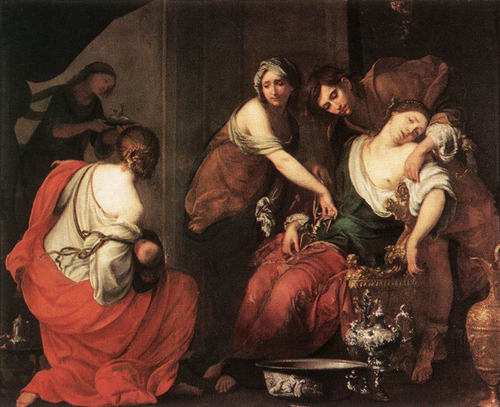




Wikidata link: [http://www.wikidata.org/entity/Q29474649](http://www.wikidata.org/entity/Q29474649)

Title: A Cynical Philosopher

Year: 1650

Creator: Luca Giordano

Copyright: public domain



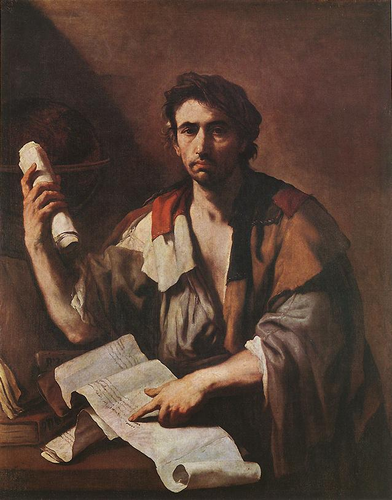




Wikidata link: [http://www.wikidata.org/entity/Q29474651](http://www.wikidata.org/entity/Q29474651)

Title: Solomon and the Queen of Sheba

Year: 1697

Creator: Luca Giordano

Copyright: public domain



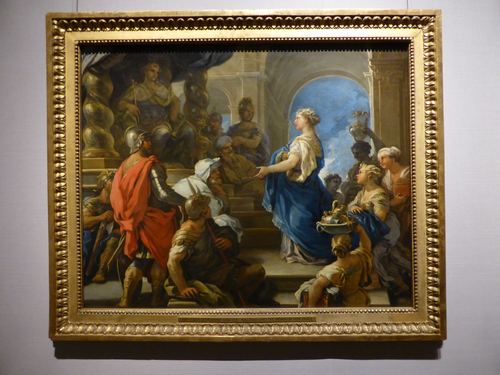




Wikidata link: [http://www.wikidata.org/entity/Q29477235](http://www.wikidata.org/entity/Q29477235)

Title: Q29477235

Year: 1674

Creator: Antonio Triva

Copyright: public domain



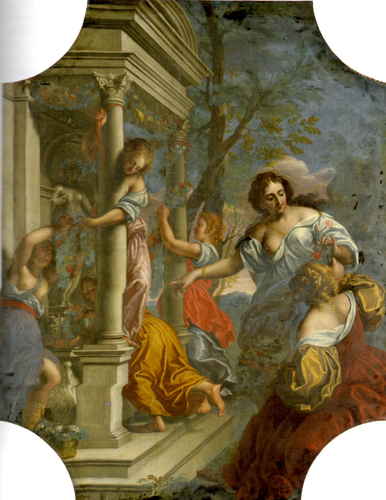




Wikidata link: [http://www.wikidata.org/entity/Q29477863](http://www.wikidata.org/entity/Q29477863)

Title: Q29477863

Year: 1633

Creator: Guido Reni

Copyright: public domain



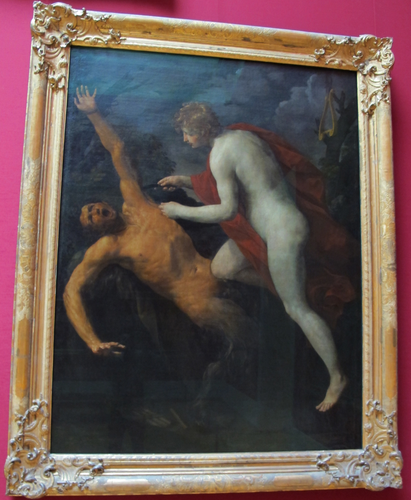




Wikidata link: [http://www.wikidata.org/entity/Q29477898](http://www.wikidata.org/entity/Q29477898)

Title: Still-Life with Books

Year: 1628

Creator: Jan Lievens

Copyright: public domain



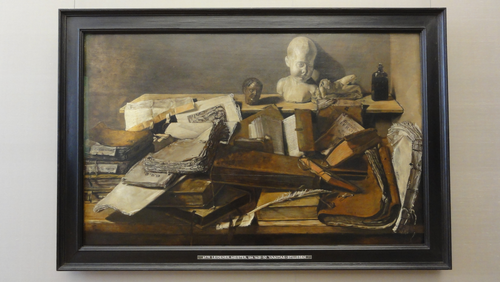




Wikidata link: [http://www.wikidata.org/entity/Q29480557](http://www.wikidata.org/entity/Q29480557)

Title: Feast of Herod

Year: 1630

Creator: http://www.wikidata.org/.well-known/genid/3f945710e81609ba4bae458b2820460a

Copyright: public domain



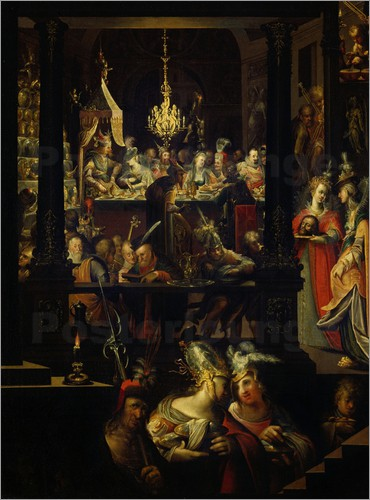




Wikidata link: [http://www.wikidata.org/entity/Q29480565](http://www.wikidata.org/entity/Q29480565)

Title: Venus and Cupid

Year: 1625

Creator: Heinrich Bollandt

Copyright: public domain



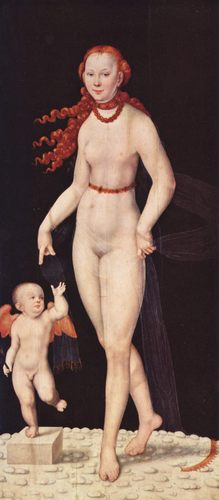




Wikidata link: [http://www.wikidata.org/entity/Q29480594](http://www.wikidata.org/entity/Q29480594)

Title: Big banquet

Year: 1620

Creator: Georg Flegel

Copyright: public domain



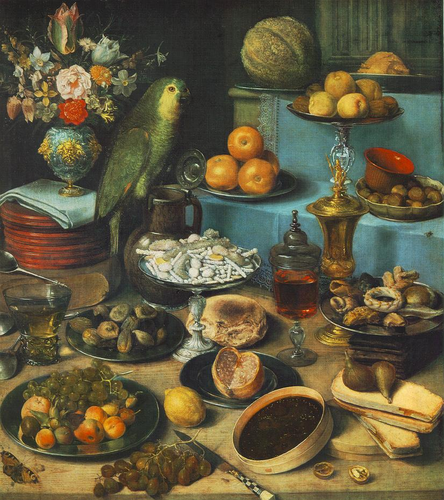




Wikidata link: [http://www.wikidata.org/entity/Q29480596](http://www.wikidata.org/entity/Q29480596)

Title: Meal with a Mouse and a Parrot

Year: 1650

Creator: Georg Flegel

Copyright: public domain



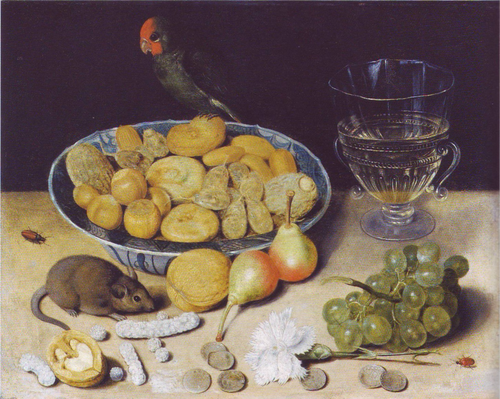




Wikidata link: [http://www.wikidata.org/entity/Q29480634](http://www.wikidata.org/entity/Q29480634)

Title: Portrait of Prince Ladislaus Sigismund Vasa

Year: 1610

Creator: http://www.wikidata.org/.well-known/genid/f77a14295b43d06ea1a0e9e3ec892c49

Copyright: public domain



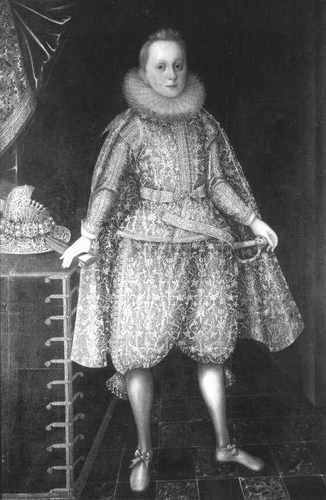




Wikidata link: [http://www.wikidata.org/entity/Q19930126](http://www.wikidata.org/entity/Q19930126)

Title: Battle Painting

Year: 1650

Creator: Johann Heinrich Schönfeld

Copyright: public domain



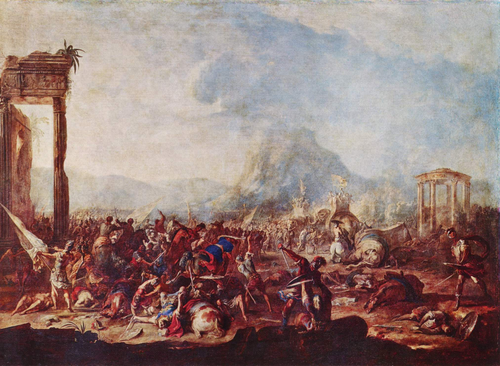




Wikidata link: [http://www.wikidata.org/entity/Q19930364](http://www.wikidata.org/entity/Q19930364)

Title: Rocky Landscape with Antique Ruins

Year: 1657

Creator: Nicolaes Pieterszoon Berchem

Copyright: public domain



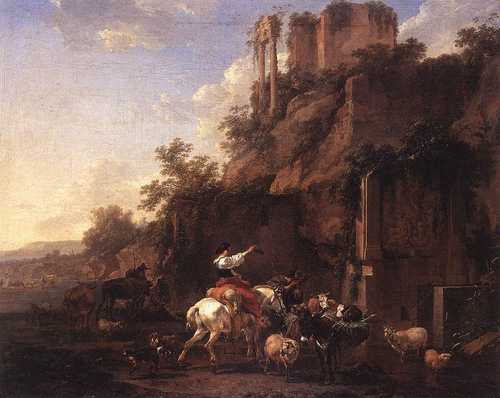




Wikidata link: [http://www.wikidata.org/entity/Q19960862](http://www.wikidata.org/entity/Q19960862)

Title: Supper at the House of Burgomaster Rockox

Year: 1632

Creator: Frans Francken the Younger

Copyright: public domain



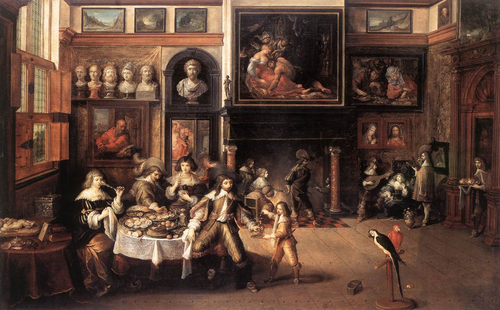




Wikidata link: [http://www.wikidata.org/entity/Q19960948](http://www.wikidata.org/entity/Q19960948)

Title: The Gallery of Archduke Leopold in Brussels (II)

Year: 1655

Creator: David Teniers the Younger

Copyright: public domain



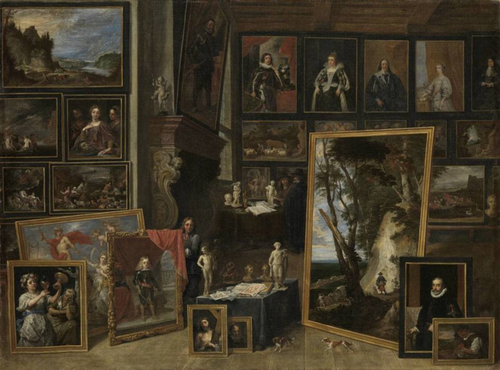




Wikidata link: [http://www.wikidata.org/entity/Q19968958](http://www.wikidata.org/entity/Q19968958)

Title: Singers

Year: 1610

Creator: Jean LeClerc

Copyright: public domain



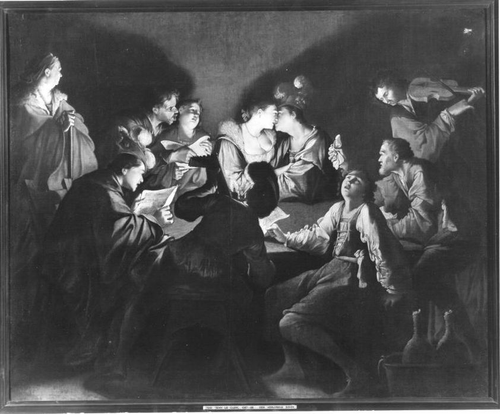




Wikidata link: [http://www.wikidata.org/entity/Q19973874](http://www.wikidata.org/entity/Q19973874)

Title: Sacrifice of Abraham

Year: 1636

Creator: Rembrandt

Copyright: public domain



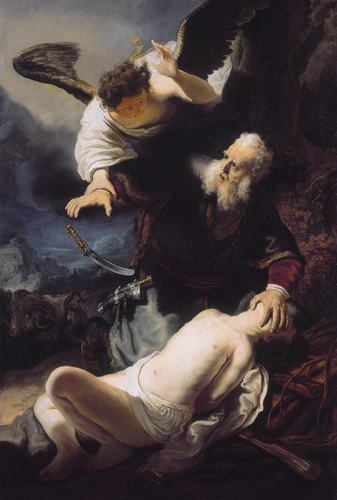




Wikidata link: [http://www.wikidata.org/entity/Q19973874](http://www.wikidata.org/entity/Q19973874)

Title: Sacrifice of Abraham

Year: 1636

Creator: http://www.wikidata.org/.well-known/genid/90c4ff7a51d7f010f33e825766fada65

Copyright: public domain



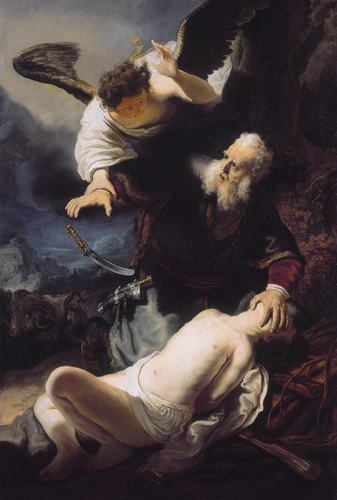




Wikidata link: [http://www.wikidata.org/entity/Q20017804](http://www.wikidata.org/entity/Q20017804)

Title: Italian Evening Landscape

Year: 1670

Creator: Nicolaes Pieterszoon Berchem

Copyright: public domain



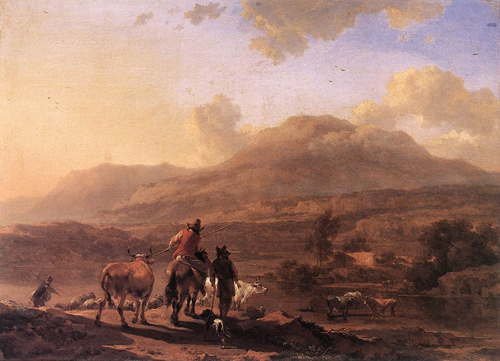




Wikidata link: [http://www.wikidata.org/entity/Q20064545](http://www.wikidata.org/entity/Q20064545)

Title: A mother with two children and a maid with a pail by a fireplace

Year: 1675

Creator: Pieter de Hooch

Copyright: public domain



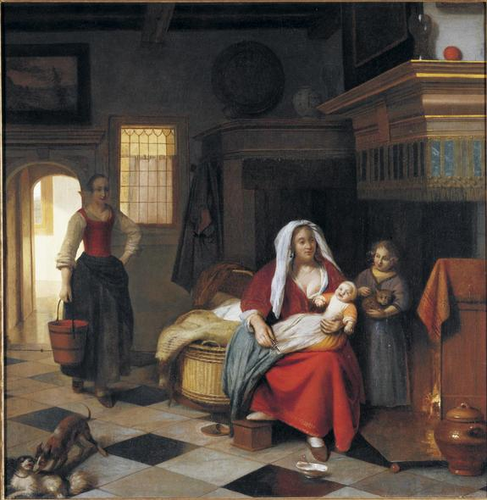

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

# VARIABLES
sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'
user_agent = 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'

# SPARQL query
query = """
SELECT ?plantLabel ?discovererLabel ?locationLabel ?image
WHERE {
  ?plant wdt:P31 wd:Q16521.
  ?plant wdt:P61 ?discoverer.
  ?plant wdt:P276 ?location.
  ?plant wdt:P18 ?image.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
LIMIT 10
"""

# SUBROUTINES
def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

# MAIN PROGRAM
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for item in result['results']['bindings']:
    print('Plant Label: ' + item['plantLabel']['value'] + '\n')
    print('Discoverer: ' + item['discovererLabel']['value'] + '\n')
    print('Location: ' + item['locationLabel']['value'] + '\n')

    image_url = item['image']['value']
    headers = {'User-Agent': user_agent}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')
